# Pymaceuticals Inc.
---

### Analysis


In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mousestudy_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mousestudy_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Checking the number of mice.
unique = len(mousestudy_df["Mouse ID"].unique())
unique

249

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
temp_df=pd.DataFrame(mousestudy_df.groupby(["Mouse ID", "Timepoint"]).count())
temp_df.loc[temp_df["Sex"]>1]

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedata_df= mousestudy_df.loc[mousestudy_df["Mouse ID"]!="g989"]
mousedata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice in the clean DataFrame.
unique = len(mousedata_df["Mouse ID"].unique())
unique

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_gb= mousedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mouse_mean= summary_gb.mean()
mouse_median=summary_gb.median()
mouse_variance= summary_gb.var()
mouse_sd=summary_gb.std()
mouse_sem=summary_gb.sem()



In [57]:
# Assemble the resulting series into a single summary dataframe.
drugdata_df=pd.DataFrame({
    "Mean Tumor Volume": mouse_mean,
    "Median Tumor Volume": mouse_median,
    "Tumor Volume Variance": mouse_variance,
    "Tumor Volume Std. Dev.": mouse_sd,
    "Tumor Volume Std. Err.": mouse_sem
})

drugdata_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mousedata_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

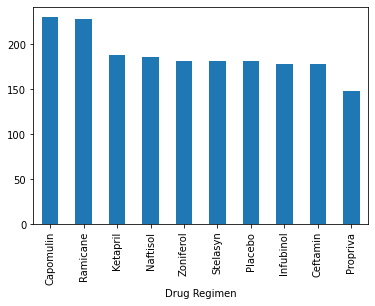

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mousedata_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False).plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

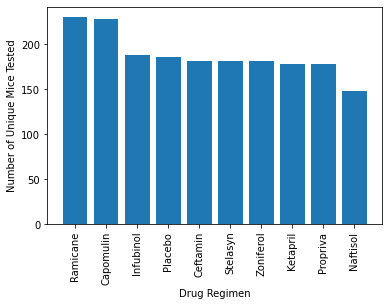

In [60]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
#Drugcount_df=pd.DataFrame(mousedata_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False))
#Drugcount_df=plt.bar('Drug Regimen', 'Mouse ID', color='b', align="center")
#Drugcount_df
#plt.ylabel("Number of Unique Mice Tested")

x_axis= mousedata_df["Drug Regimen"].unique()
value_count= mousedata_df["Drug Regimen"].value_counts()

plt.bar(x_axis, value_count)
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")



plt.show

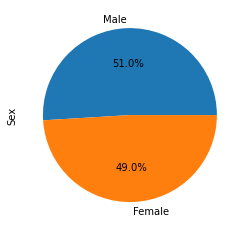

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count= mousedata_df["Sex"].value_counts()
sex_count.plot(kind="pie", y=[1], autopct="%1.1f%%")

<function matplotlib.pyplot.show(*args, **kw)>

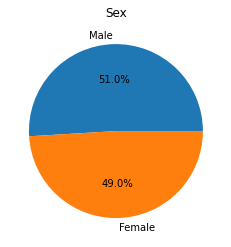

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count= mousedata_df["Sex"].value_counts()
labels= ["Male", "Female"]
plt.pie(sex_count, labels=labels, autopct="%1.1f%%")
plt.title('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maxtime_df=pd.DataFrame(mousedata_df.groupby("Mouse ID")["Timepoint"].max())

drug_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
druglist_df=mousedata_df.loc[mousedata_df['Drug Regimen'].isin(drug_list)]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_df = pd.merge(mousedata_df, maxtime_df, on=["Timepoint", "Mouse ID"], how="right")
tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol= []

for drug in drug_list: 
    vol =tumor_df.loc[tumor_df["Drug Regimen"] ==drug] ["Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles= vol.quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq)
    iqr_1_5 = (iqr * 1.5)

# Determine outliers using upper and lower bounds
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5

#Determine Potential Outliers

    outliers= (vol.loc[(tumor_df['Tumor Volume (mm3)'] > upper_bound) | 
                       (tumor_df['Tumor Volume (mm3)'] < lower_bound)])
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


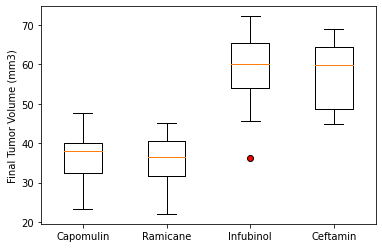

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol, labels=drug_list, flierprops=dict(markerfacecolor="red"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

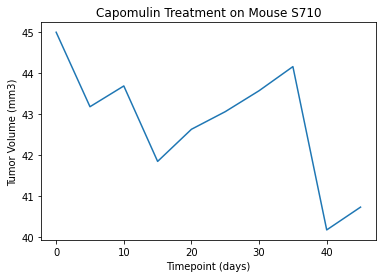

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo=["Capomulin"]
mouse= ["s710"]
capo_df= mousedata_df.loc[mousedata_df['Drug Regimen'].isin(capo)]
mouse2= capo_df.loc[capo_df['Mouse ID'].isin(mouse)]

capo_time= mouse2["Timepoint"]
capo_vol= mouse2["Tumor Volume (mm3)"]

plt.plot(capo_time, capo_vol)
plt.title('Capomulin Treatment on Mouse S710')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

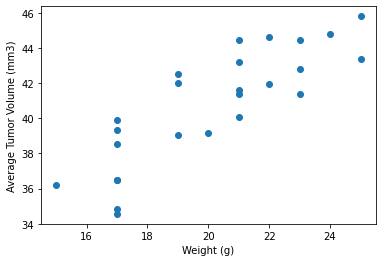

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mean= capo_df.groupby('Mouse ID').mean()

x_weight=capo_mean["Weight (g)"]
y_weight=capo_mean["Tumor Volume (mm3)"]

plt.scatter(x_weight, y_weight)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


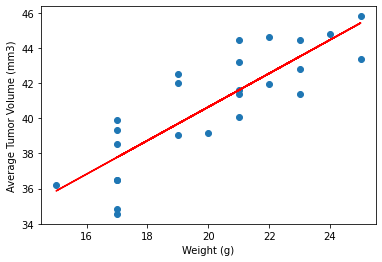

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor_coe=st.pearsonr(x_weight, y_weight)
cor_coe= round(cor_coe[0],2)

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_weight, y_weight)
regress_values= x_weight * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The correlation between mouse weight and the average tumor volume is {cor_coe}')
plt.scatter(x_weight, y_weight)
plt.plot(x_weight, regress_values, "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
